<a href="https://colab.research.google.com/github/kavyabalaguru/classification_of_birds_using_logistic_regression/blob/main/classification_of_birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bird.csv to bird.csv


**IMPORTING PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
data=pd.read_csv('bird.csv',header=0)
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


**EXPLORATORY DATA ANALYSIS**

In [ ]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(413, 12)
['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw', 'type']


In [ ]:
data.isnull().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

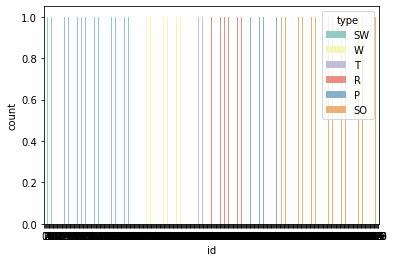

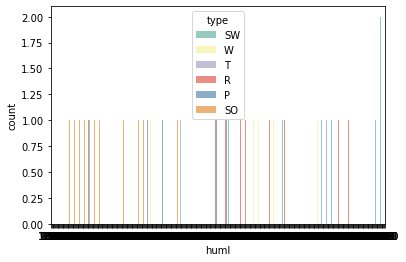

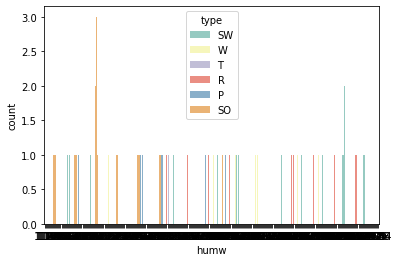

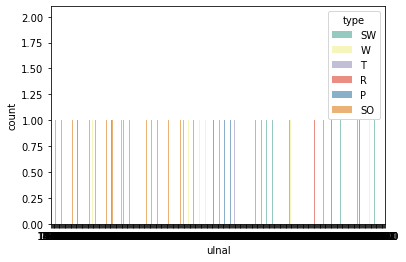

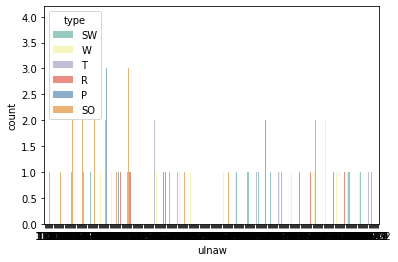

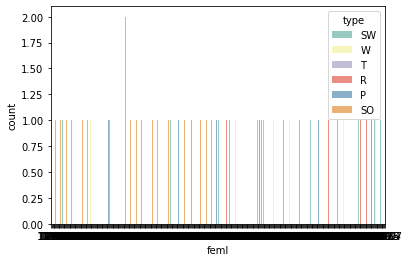

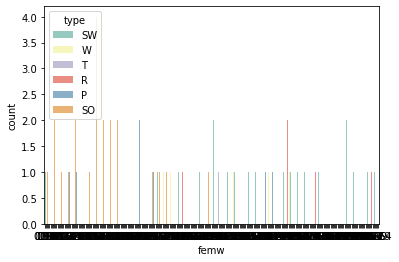

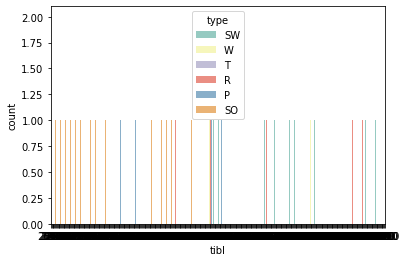

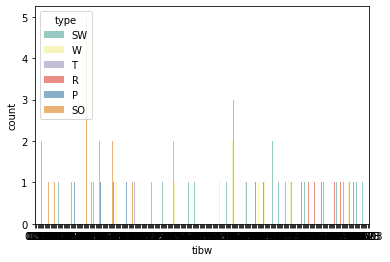

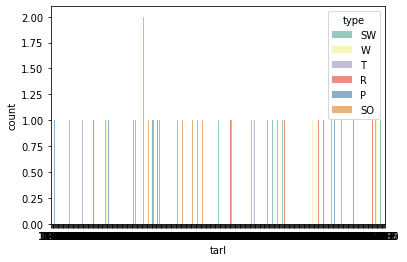

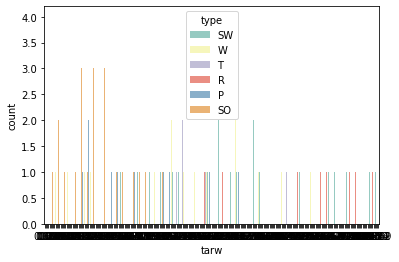

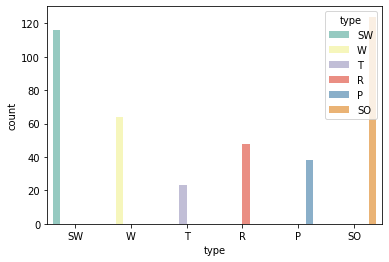

In [ ]:
features=['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw', 'type']
for f in features:
    sns.countplot(x=f,data=data,palette='Set3',hue='type')
    plt.show()

In [ ]:
cleanup_nums = {'type':     {"SW": 0, "W": 1, "T":2, "R":3, "P":4, "SO":5}}
data.replace(cleanup_nums, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


**FITTING LOGISTIC REGRESSION FOR CLASSIFICATION**

In [ ]:
x=data.drop('type',axis=1).values
y=data['type']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
#Fitting Logistic Regression'
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print("Accuracy of logistic regression classifier on test set:",metrics.accuracy_score(y_test, predictions))

Accuracy of logistic regression classifier on test set: 0.7903225806451613


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**CONFUSION MATRIX**

In [ ]:
#DISPLAYING CONFUSION MATRIX
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30  6  1  0  0  0]
 [ 3 13  0  0  1  0]
 [ 0  1  3  0  1  0]
 [ 0  3  1 12  3  0]
 [ 0  0  0  0  5  5]
 [ 0  0  0  0  1 35]]


Text(0.5, 257.44, 'Predicted label')

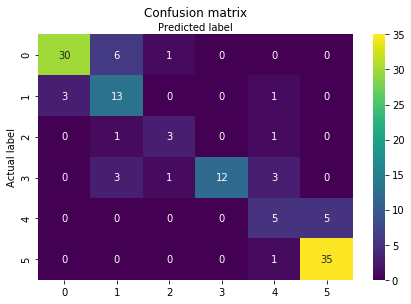

In [ ]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(data))
plt.xticks(tick_marks, data)
plt.yticks(tick_marks, data)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**ROC CURVE**

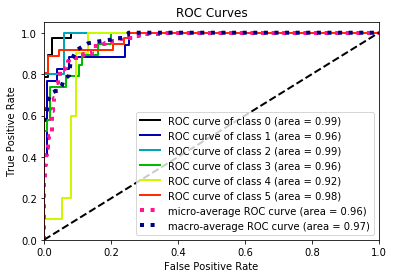

In [ ]:
!pip install scikit-plot
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
predicted_probas = nb.predict_proba(x_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

